# importing libraries

In [1]:
import pandas as pd
from pandas import to_datetime
import numpy as np
import seaborn as sns
import cufflinks as cf
import plotly.express as px
import plotly.express.colors as colors
import chart_studio.plotly as py
import plotly.graph_objects as go
import glob
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')

# Reading the file

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# Getting the number of rows and columns

In [4]:
df.shape

(1000, 10)

# Getting the info of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


# checking for null values

In [6]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

# checing for duplicates

In [7]:
df.duplicated().sum()

0

# cleaning the timestamp column

In [8]:
df['Timestamp']= pd.to_datetime(df['Timestamp'])

In [9]:
df['Date'] = df['Timestamp'].dt.date
df['Time'] = df['Timestamp'].dt.time

In [10]:
df.drop(columns=['Timestamp'], inplace=True)

In [11]:
df['Date']= to_datetime(df['Date'])

In [12]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Date,Time
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,2016-03-27,00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,2016-04-04,01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,2016-03-13,20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,2016-01-10,02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,2016-06-03,03:36:18


# Cleaning the Male and Clicked on Ad columns

In [13]:
# converting columns to string datatype

df['Male'] = df['Male'].astype('str')
df['Clicked on Ad'] = df['Clicked on Ad'].astype('str')

In [14]:
# function to change values in column

def change_values(col):
    if '0' in col:
        return str(col.replace('0','No')) # replaces 'kg' with empty string if found
    else:
        return str(col.replace('1','Yes')) # replaces 'kg' with empty string if found
 

In [15]:
# apply function to column

df['Male'] = df['Male'].apply(change_values)

In [16]:
# apply function to column
df['Clicked on Ad'] = df['Clicked on Ad'].apply(change_values)

In [17]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Date,Time
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,No,Tunisia,No,2016-03-27,00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Yes,Nauru,No,2016-04-04,01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,No,San Marino,No,2016-03-13,20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Yes,Italy,No,2016-01-10,02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,No,Iceland,No,2016-06-03,03:36:18


# Exploratory Data Analysis(EDA)
* Top 10 Countries by Time Spent Daily
* Top 10 Countries by Daily Internet Usage
* Top 10 Countries by Area Income
* Little summary
* Number Of Clicks On Ads
* Number of Clicks per Age



# Top 10 Countries by Time Spent Daily

In [18]:
# Calculate the sum of daily time spent on site for each country
time_spent = df.groupby(['Country'])['Daily Time Spent on Site'].sum().sort_values(ascending = True).tail(10)

# Create a dataframe from the series
df_time_spent = pd.DataFrame({'Country': time_spent.index, 'Daily Time Spent on Site': time_spent.values})

# Create a horizontal bar chart using Plotly
fig = px.bar(df_time_spent, x='Daily Time Spent on Site', y='Country', orientation='h', color='Daily Time Spent on Site')

# Add annotations to the bars
fig.update_traces(textposition='inside', texttemplate='%{x:.2f}')

# Add title and x-axis label, and customize the layout
fig.update_layout(
    title='Top 10 Countries by Time Spent Daily',
    xaxis_title='Daily Time Spent on Site',
    font=dict(size=12),
    plot_bgcolor='rgb(243, 243, 243)',
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()


# Top 10 Countries by Daily Internet Usage

In [19]:
daily_internet = df.groupby(['Country'])['Daily Internet Usage'].sum().sort_values(ascending = True).tail(10)

# Create a dataframe from the series
df_area_income = pd.DataFrame({'Country': daily_internet.index, 'Daily Internet Usage': daily_internet.values})


fig = px.bar(df_area_income, x='Daily Internet Usage', y='Country', orientation='h',
             color='Daily Internet Usage')

fig = px.bar(df_area_income, x='Daily Internet Usage', y='Country', orientation='h',
             color='Daily Internet Usage',
             text='Daily Internet Usage')
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')


fig = px.bar(df_area_income, x='Daily Internet Usage', y='Country', orientation='h',
             color='Daily Internet Usage',
             text='Daily Internet Usage', hover_data={'Daily Internet Usage': ':.2f'},
             hover_name='Country')


fig.update_layout(title='Top 10 Countries by Daily Internet Usage',
                  xaxis_title='Daily Internet Usage', yaxis_title='',
                  margin=dict(l=100, r=50, t=50, b=50),
                  plot_bgcolor='rgba(0,0,0,0.05)', font_size=12)

# Top 10 Countries by Area Income

In [20]:
# Group the data by country and calculate the sum of Area Income for each country
area_income = df.groupby(['Country'])['Area Income'].sum().sort_values(ascending=True).tail(10)

# Create a dataframe from the series
top_countries_by_income = pd.DataFrame({'Country': area_income.index, 'Area Income': area_income.values})

# Create a horizontal bar chart using Plotly
fig = px.bar(top_countries_by_income, x='Area Income', y='Country', orientation='h',
             color='Area Income',
             text='Area Income', hover_data={'Area Income': ':.2f'},
             hover_name='Country')

# Add title and axis labels
fig.update_layout(title='Top 10 Countries by Area Income', xaxis_title='Area Income (USD)', yaxis_title='Country',
                  margin=dict(l=100, r=50, t=50, b=50),
                  plot_bgcolor='rgba(0,0,0,0.05)', font_size=12)

# Format the x-axis labels with commas
fig.update_xaxes(tickformat=',.0f')

# Show the plot
fig.show()
# check number of clicks per age 



# france == 65,666,846
# Czech Republic == 10,763,732
# greece == 10,283,962

# Number Of Clicks On Ads

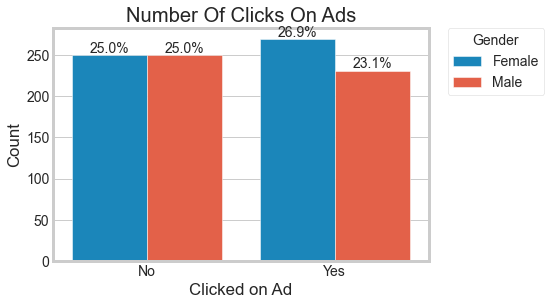

In [21]:
# create the plot
sns.set_style('whitegrid')
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Clicked on Ad', hue='Male', data=df)

# set the title and labels
plt.title('Number Of Clicks On Ads')
plt.xlabel('Clicked on Ad')
plt.ylabel('Count')

# add percentages to the bars
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{0:.1%}'.format(height / total),
            ha="center")

# adjust the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Female', 'Male'], title='Gender', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# show the plot
plt.show()


# Number of Clicks per Age

In [22]:
# Those that clicked - yes

ad_click = df[df['Clicked on Ad'] == 'Yes']
# Those that didn't click - no

no_click = df[df['Clicked on Ad'] == 'No']

In [23]:
# check number of clicks per age 
age_click = ad_click.groupby(['Age', 'Clicked on Ad']).size().reset_index(name='Click Count')

fig = px.line(age_click, x='Age', y='Click Count', title='Number of Clicks per Age',
              hover_data=['Click Count'])
fig.update_layout(xaxis_title='Age', yaxis_title='Number of Clicks',
                  xaxis=dict(tickvals=[20, 25, 30, 35, 40, 45, 50, 55, 60]))
fig.show()
